In [3]:
import numpy as np
import scipy.stats as st
from astropy.io import fits,ascii
from astropy.time import Time
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec


%matplotlib inline

# Example of loading fits file and plotting lightcurve

In [4]:
cx_obs1_10s = fits.open('cxou88_sub_lc_10s_newfil.fits')[1].data
cx_obs2_10s = fits.open('cxou89_sub_lc_10s_newfil.fits')[1].data

cx_obs1_10s_bg = fits.open('cxou88_bkg_lc_10s_newfil.fits')[1].data
cx_obs2_10s_bg = fits.open('cxou89_bkg_lc_10s_newfil.fits')[1].data

cx_obs1_1ks = fits.open('cxou88_sub_lc_1.5ks_newfil.fits')[1].data
cx_obs2_1ks = fits.open('cxou89_sub_lc_1.5ks_newfil.fits')[1].data

cx_obs1_1ks_bg = fits.open('cxou88_bkg_lc_1.5ks_newfil.fits')[1].data
cx_obs2_1ks_bg = fits.open('cxou89_sub_lc_1.5ks_newfil.fits')[1].data



/home/kcdage/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


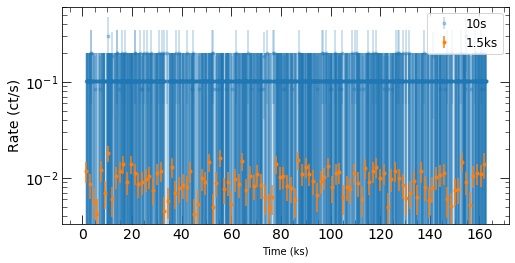

In [5]:

plt.figure(figsize=(8,4))
plt.errorbar((cx_obs1_10s['TIME']-cx_obs1_10s['TIME'][0])/1000,cx_obs1_10s['NET_RATE'],cx_obs1_10s['ERR_RATE'],fmt='.',alpha=0.3, label='10s')
plt.errorbar((cx_obs1_1ks['TIME']-cx_obs1_1ks['TIME'][0])/1000,cx_obs1_1ks['NET_RATE'],cx_obs1_1ks['ERR_RATE'],  fmt='.',alpha=1.0, label='1.5ks')
plt.legend(loc=1,numpoints=1,fontsize=12)
plt.xlabel('Time (ks)')
plt.ylabel('Rate (ct/s)', fontsize=14)
plt.yscale('log')

#formatting for tick marks
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='major', length=9)
plt.tick_params(axis='both', which='minor', length=4.5)
plt.tick_params(axis='both', which='both',direction='in',right='on',top='on')



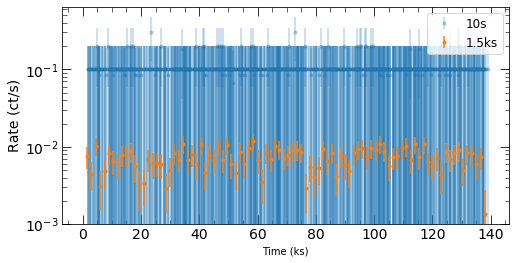

In [6]:

plt.figure(figsize=(8,4))
plt.errorbar((cx_obs2_10s['TIME']-cx_obs2_10s['TIME'][0])/1000,cx_obs2_10s['NET_RATE'],cx_obs2_10s['ERR_RATE'],fmt='.',alpha=0.3, label='10s')
plt.errorbar((cx_obs2_1ks['TIME']-cx_obs2_1ks['TIME'][0])/1000,cx_obs2_1ks['NET_RATE'],cx_obs2_1ks['ERR_RATE'],  fmt='.',alpha=1.0, label='1.5ks')
plt.legend(loc=1,numpoints=1,fontsize=12)
plt.xlabel('Time (ks)')
plt.ylabel('Rate (ct/s)', fontsize=14)
plt.yscale('log')

#formatting for tick marks
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='major', length=9)
plt.tick_params(axis='both', which='minor', length=4.5)
plt.tick_params(axis='both', which='both',direction='in',right='on',top='on')



# Example of how to search for periodic signals using Lomb-Scargle periodogram

In [7]:
##combine signal arrays from two observations
Time_10s=np.concatenate((cx_obs1_10s['TIME'],cx_obs2_10s['TIME']))
Time_1ks=np.concatenate((cx_obs1_1ks['TIME'],cx_obs2_1ks['TIME']))

Rate_10s=np.concatenate((cx_obs1_10s['NET_RATE'],cx_obs2_10s['NET_RATE']))
Rate_1ks=np.concatenate((cx_obs1_1ks['NET_RATE'],cx_obs2_1ks['NET_RATE']))

##combine background
Time_10s_bg=np.concatenate((cx_obs1_10s_bg['TIME'],cx_obs2_10s_bg['TIME']))
Time_1ks_bg=np.concatenate((cx_obs1_1ks_bg['TIME'],cx_obs2_1ks_bg['TIME']))

Rate_10s_bg=np.concatenate((cx_obs1_10s_bg['COUNT_RATE'],cx_obs2_10s_bg['COUNT_RATE']))
Rate_1ks_bg=np.concatenate((cx_obs1_1ks_bg['COUNT_RATE'],cx_obs2_1ks_bg['COUNT_RATE']))




In [8]:
from astropy.stats import LombScargle
frequency, power = LombScargle(Time_10s, Rate_10s).autopower()

frequency2, power2 = LombScargle(Time_1ks, Rate_1ks).autopower()





Text(0,0.5,'Power')

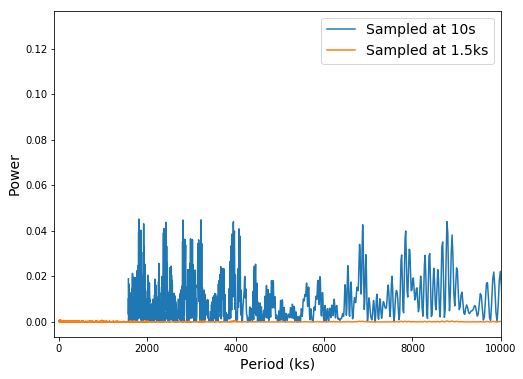

In [9]:
plt.figure(figsize=(8,6))
plt.plot(1.0/frequency2, power2, label='Sampled at 10s')


plt.plot(1.0/frequency, power, label='Sampled at 1.5ks')
#plt.axvline(x=10, color='c', ls='--',  label='10s Sampling Frequency')
#plt.axvline(x=1500,   color='y', ls='--', label='1.5ks Sampling Frequency')

plt.xlim(-100, 10000)
plt.legend(loc=1, fontsize=14)
plt.xlabel('Period (ks)', fontsize=14)
plt.ylabel('Power', fontsize=14)


# What does the FT of the background look like

In [10]:
frequency_bg, power_bg = LombScargle(Time_10s_bg, Rate_10s_bg).autopower()

frequency2_bg, power2_bg = LombScargle(Time_1ks_bg, Rate_1ks_bg).autopower()


Text(0,0.5,'Power')

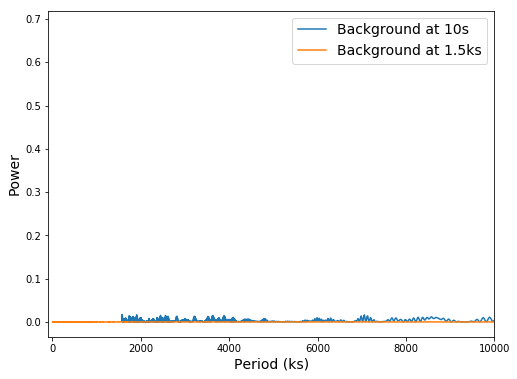

In [11]:
plt.figure(figsize=(8,6))
plt.plot(1.0/frequency2_bg, power2_bg, label='Background at 10s')


plt.plot(1.0/frequency_bg, power_bg, label='Background at 1.5ks')
#plt.axvline(x=10, color='c', ls='--',  label='10s Sampling Frequency')
#plt.axvline(x=1500,   color='y', ls='--', label='1.5ks Sampling Frequency')

plt.xlim(-100, 10000)
plt.legend(loc=1, fontsize=14)
plt.xlabel('Period (ks)', fontsize=14)
plt.ylabel('Power', fontsize=14)


# what about white noise?

In [16]:
import random
def wht_noise(in_1, in_2):
    shf_1=random.sample(in_1, len(in_1))
    shf_2=random.sample(in_2, len(in_2))
  
    return
    return np.concatenate((shf_1, shf_2))

In [17]:
wt_10s=wht_noise(cx_obs1_10s['NET_RATE'], cx_obs2_10s['NET_RATE'])
wt_1ks=wht_noise(cx_obs1_1ks['NET_RATE'],cx_obs2_1ks['NET_RATE'])

In [ ]:

frequencywt, powerwt = LombScargle(Time_10s, wt_10s).autopower()

frequency2wt, power2wt = LombScargle(Time_1ks, wt_1ks).autopower()
